# Numpy 

Pythonでは，値の集合を「コンテナ」と呼び，代表的なものとして

- リスト(List): [1, 'two', [3], 3.14]
    - タプル(Tuple): (1, 'two', [3], 3.14)
    - 文字列(Str): 'aa83988848'
- 集合(Set): {1, 'two', [3], 3.14}
    - 辞書(Dict): {'v1':1, 'v2':'two', 'v3':[3], 'v4':3.14}

があります．コンテナは，基本的に各要素が異なる型(クラス)でも構いません．要素がさらにコンテナであっても構いません．

In [1]:
MyList = [1, 'two', [3], 3.14]
MyTuple = (1, 'two', [3], 3.14)
MyStr = 'aa83988848'
MySet = {1, 'two', 3.14} # setはコンテナを要素に持てない
MyDict = {'v1':1, 'v2':'two', 'v3':[3], 'v4':3.14}

print('==MyList==')
print(f'{MyList}')

print('==MyTuple==')
print(f'{MyTuple}')

print('==MyStr==')
print(f'{MyStr}')

print('==MySet==')
print(f'{MySet}')

print('==MyDict==')
print(f'{MyDict}')


==MyList==
[1, 'two', [3], 3.14]
==MyTuple==
(1, 'two', [3], 3.14)
==MyStr==
aa83988848
==MySet==
{1, 'two', 3.14}
==MyDict==
{'v1': 1, 'v2': 'two', 'v3': [3], 'v4': 3.14}


これらのコンテナに対して演算をすると

In [404]:
print('==MyList * 3==')
print(f'{MyList * 3}')

print('==MyTuple * 3==')
print(f'{MyTuple * 3}')

print('==MyStr * 3==')
print(f'{MyStr * 3}')

#print('==MySet * 3==')
#print(f'{MySet * 3}') # Setは演算できない

#print('==MyDict * 3==')
#print(f'{MyDict * 3}') # Dictは演算できない

MyList2 = [1, 2, 3]
print('==MyList + MyList2==')
print(f'{MyList + MyList2}')

==MyList * 3==
[1, 'two', [3], 3.14, 1, 'two', [3], 3.14, 1, 'two', [3], 3.14]
==MyTuple * 3==
(1, 'two', [3], 3.14, 1, 'two', [3], 3.14, 1, 'two', [3], 3.14)
==MyStr * 3==
aa83988848aa83988848aa83988848
==MyList + MyList2==
[1, 'two', [3], 3.14, 1, 2, 3]


というように，後ろに繰り返し要素を付け加えることになります．

それぞれの要素に対し演算するには，どうしたらいいでしょうか．そのような演算をベクトル演算といいます．

ベクトル演算をするためのコンテナをNumpy Arrayといいます．

NumPyというパッケージにNumPy Arrayクラスが定義されています．

## Numpy Array

In [405]:
import numpy as np

MyArray = np.array(MyList)
print('==MyArray==')
print(f'{MyArray}')

print('==MyArray * 3==')
print(f'{MyArray * 3}')

==MyArray==
[1 'two' list([3]) 3.14]
==MyArray * 3==
[3 'twotwotwo' list([3, 3, 3]) 9.42]


/var/folders/qq/y0p5l6xd5qb7l_6_x0nmwhv40000gn/T/ipykernel_49141/3223551522.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  MyArray = np.array(MyList)


- 0番目の要素と3番目の要素は数値なので，3倍されています．
- 1番目の要素は文字列なので，文字列*3，つまりコンテナを後ろに3回繰り返したものになります．
- 2番目の要素もリストなので，リスト*3，つまりコンテナを後ろに3回繰り返したものになります．



要素数の異なるNumpyArrayとの加算はできません．

In [406]:
MyArray2 = np.array(MyList2)
print('==MyArray + MyArray2==')
#print(f'{MyArray + MyArray2}')

==MyArray + MyArray2==


NumpyArrayは，線形代数における行列やベクトルなので，行列やベクトルに対する演算しか許されないというわけです．

## テンソル

「NumpyArrayは，行列やベクトル」と言いましたが，行列やベクトルには形があります．

$$
M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$    

のとき，Mの形は「2行3列」です．

$$
v = \begin{bmatrix}
7 \\
8 \\
9
\end{bmatrix}
$$

のとき，vの形は「3行1列」ですね．

$$
u = \begin{bmatrix}
10 & 11 
\end{bmatrix}
$$

のとき，uの形は「1行2列」ですね．

NumpyArrayで 2行3列の行列を作ってみましょう．
すべての要素がゼロな2行3列の行列は，Numpyのzeros関数で作ることができます．


In [407]:
M = np.zeros((2,3))
print(M)


[[0. 0. 0.]
 [0. 0. 0.]]


行列の形は 属性`.shape`に保存されています．

In [408]:
print(M.shape)

(2, 3)


形(2,3)のMを`print`したときの表示を見てみると，「行ごとの3つの要素がリストになっており，2行のリストをさらにリストに」しています．

実は，このようなリストからNumpyArrayを作ることもできます．

In [409]:
u1 = [1,2,3]
u2 = [4,5,6]
L = [u1, u2]
M = np.array(L)
print(M)
print(M.shape)


[[1 2 3]
 [4 5 6]]
(2, 3)


では，7と8と9を要素にもつ1行3列のNumpyArrayを作ってみましょう．行ごとにリストに，全体をさらにリストにします．つまり2重リストになります．

In [410]:
Lx = [[7,8,9]]
x = np.array(Lx)
print(x)
print(x.shape)

[[7 8 9]]
(1, 3)


このxを転置すれば，Mxが計算できます．転置はNumpyの`transpose`関数を使います．また，行列積はNumpyの`matmul`関数です．(ちなみに`*`は要素積（要素同士の積）です．)

In [411]:
R = np.matmul(M, np.transpose(x))
print(R)
print(R.shape)

[[ 50]
 [122]]
(2, 1)


皆が知っているように，行列積は，「左の行列の列数」と「右の行列の行数」が同じでなければいけません．上の例の場合，(2,3)と(3,1)なので行列積は(2,1)となるわけですね．

ところで，xは行列でしょうか？ベクトルでしょうか？

行ベクトルとか列ベクトルと言われているものですが，Numpyでは
「行数」とか「列数」とか言っているので，これは「行列」なのです．では，ベクトルは？

ベクトルとは，1重のリストから作ったものをいいます．「行」や「列」という概念がありません．

In [412]:
Ly = [7,8,9]
y = np.array(Ly)
print(y)
print(y.shape)

[7 8 9]
(3,)


さきほどの x は形が(1,3)で，転置した`np.transpose(x)`は(3,1)でした．今度の y は(3,)です．さきほどの行列積ができます．

In [413]:
R2 = np.matmul(M, y)
print(R2)
print(R2.shape)

[ 50 122]
(2,)


R2はさきほどのRと要素は同じ数値ですが，(2,1)ではなく(2,)となります．（行列積の作られ方どおりです．）

まとめると
- 行列: 2重のリストから作られる．形は (S1, S2)，行数S1, 列数S2
- ベクトル: 1重のリストから作られる．形は (S1,), 要素数S1

行列積は，np.matmul関数で，
- 左のArrayの形が(S1,S2)で，右のArrayの形が(S3,S4)のとき，S2==S3なら演算できて，答えのArrayの形は(S1,S4)

転置は np.transpose関数で，
- 形が(S1,S2)の行列の転置は，形が(S2,S1)となる
- 形が(S1,)のベクトルの転置は，形が変わらず(S1,)となる


In [414]:
print(y.shape)
yt = np.transpose(y)
print(yt.shape)

(3,)
(3,)


行列やベクトルをまとめて，一般的に「テンソル」と言います．さきほどの「n重のリスト」の`n`を階数といいます．

- 行列: 2階テンソル
- ベクトル: 1階テンソル

ここで，1重リストを並べたものをさらにリストにすれば，2重リストになるので，すなわち(S1,)ベクトル（1階テンソル）をS2個並べると(S2,S1)行列（2階テンソル）になるということです．
要素が(S1,)ベクトルである(S2,)ベクトルは，(S2,S1)という行列になります．

属性`.ndim`に保存されています．属性`.shape`に保存されている「形」を表すタプルの要素数でもあります．

In [415]:
A1 = np.array([1,2,3,4])
print(A1)
print(f'shape(形):{A1.shape}')
print(f'ndim(階数):{A1.ndim}')
print(f'size(要素数):{A1.size}')
print('\n')

A2 = np.array([[1,2,3,4]])
print(A2)
print(f'shape(形):{A2.shape}')
print(f'ndim(階数):{A2.ndim}')
print(f'size(要素数):{A2.size}')
print('\n')

A3 = np.array([[[1,2,3,4]]])
print(A2)
print(f'shape(形):{A3.shape}')
print(f'ndim(階数):{A3.ndim}')
print(f'size(要素数):{A3.size}')
print('\n')



[1 2 3 4]
shape(形):(4,)
ndim(階数):1
size(要素数):4


[[1 2 3 4]]
shape(形):(1, 4)
ndim(階数):2
size(要素数):4


[[1 2 3 4]]
shape(形):(1, 1, 4)
ndim(階数):3
size(要素数):4




3階以上になっても行列積(テンソル積)は同じです．

In [416]:
T3 = np.array([[[1,2,3,4]]])
T1 = np.array([5,6,7,8])
Result = np.matmul(T3,T1)
print(f'{T3.ndim}階テンソル（形{T3.shape})と{T1.ndim}階テンソル(形{T1.shape})の行列積は{Result.ndim}階テンソル（形{Result.shape})')
print(Result)

3階テンソル（形(1, 1, 4))と1階テンソル(形(4,))の行列積は2階テンソル（形(1, 1))
[[70]]


## 抽出

In [417]:
M = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(M,type(M),M.shape,M.ndim,M.size,'\n')

M_row = M[1] # 行
print(M_row,type(M_row),M_row.shape,M_row.ndim,M_row.size,'\n')

M_item = M[1][2] # (1,2)要素 M[1,2]とは書けない
print(M_item,type(M_item),M_item.shape,M_item.ndim,M_item.size,'\n')

M_slice = M[1:3,0:2] #スライス
print(M_slice,type(M_slice),M_slice.shape,M_slice.ndim,M_slice.size,'\n')

M_column = M[:,1] # 列抽出はスライスで
print(M_column,type(M_column),M_column.shape,M_column.ndim,M_column.size,'\n')

M_sub = M[[0,2],[1,3]] # (0,1)要素と(2,3)要素　（スライス）
print(M_sub,type(M_sub),M_sub.shape,M_sub.ndim,M_sub.size)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] <class 'numpy.ndarray'> (3, 4) 2 12 

[5 6 7 8] <class 'numpy.ndarray'> (4,) 1 4 

7 <class 'numpy.int64'> () 0 1 

[[ 5  6]
 [ 9 10]] <class 'numpy.ndarray'> (2, 2) 2 4 

[ 2  6 10] <class 'numpy.ndarray'> (3,) 1 3 

[ 2 12] <class 'numpy.ndarray'> (2,) 1 2


## 追加

In [418]:
u1 = np.array([[1,2],[3,4]])
u2 = np.array([[11,12],[13,14]])

print('==np.concat: 階数を変えずに，連結する．==')
M1 = np.concatenate([u1,u2])
print(M1)
print(f'形:{M1.shape},階:{M1.ndim},要素数:{M1.size}\n')
M2 = np.concatenate([u1,u2],axis=1)
print(M2)
print(f'形:{M2.shape},階:{M2.ndim},要素数:{M2.size}\n')

print('==np.stack: 指定した階に，積む==')
M3 = np.stack([u1,u2],axis=0)
print(M3)
print(f'形:{M3.shape},階:{M3.ndim},要素数:{M3.size}\n')

M4 = np.stack([u1,u2],axis=1)
print(M4)
print(f'形:{M4.shape},階:{M4.ndim},要素数:{M4.size}\n')

M5 = np.stack([u1,u2],axis=2)
print(M5)
print(f'形:{M5.shape},階:{M5.ndim},要素数:{M5.size}\n')


==np.concat: 階数を変えずに，連結する．==
[[ 1  2]
 [ 3  4]
 [11 12]
 [13 14]]
形:(4, 2),階:2,要素数:8

[[ 1  2 11 12]
 [ 3  4 13 14]]
形:(2, 4),階:2,要素数:8

==np.stack: 指定した階に，積む==
[[[ 1  2]
  [ 3  4]]

 [[11 12]
  [13 14]]]
形:(2, 2, 2),階:3,要素数:8

[[[ 1  2]
  [11 12]]

 [[ 3  4]
  [13 14]]]
形:(2, 2, 2),階:3,要素数:8

[[[ 1 11]
  [ 2 12]]

 [[ 3 13]
  [ 4 14]]]
形:(2, 2, 2),階:3,要素数:8



# 形を変形

In [419]:
T = np.array([[1,2,3,4],[5,6,7,8]])
print(T)
print(f'形:{T.shape}, 階:{T.ndim}, 要素数:{T.size}\n')

T2 = np.reshape(T,(1,8))
print(T2)
print('前から順に8要素のリストを1個')
print(f'形:{T2.shape}, 階:{T2.ndim}, 要素数:{T2.size}\n')

T3 = np.reshape(T,(8,1))
print(T3)
print('前から順に1要素のリストを8個')
print(f'形:{T3.shape}, 階:{T3.ndim}, 要素数:{T3.size}\n')


T4 = np.reshape(T,(4,2))
print(T4)
print('前から順に2要素のリストを4個')
print(f'形:{T4.shape}, 階:{T4.ndim}, 要素数:{T4.size}\n')

T5 = np.reshape(T,(8,))
print(T5)
print('前から順に8要素')
print(f'形:{T5.shape}, 階:{T5.ndim}, 要素数:{T5.size}\n')

T6 = np.reshape(T,(1,2,4))
print(T6)
print('前から順に4要素2個の要素を1個')
print(f'形:{T6.shape}, 階:{T6.ndim}, 要素数:{T6.size}\n')


[[1 2 3 4]
 [5 6 7 8]]
形:(2, 4), 階:2, 要素数:8

[[1 2 3 4 5 6 7 8]]
前から順に8要素のリストを1個
形:(1, 8), 階:2, 要素数:8

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
前から順に1要素のリストを8個
形:(8, 1), 階:2, 要素数:8

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
前から順に2要素のリストを4個
形:(4, 2), 階:2, 要素数:8

[1 2 3 4 5 6 7 8]
前から順に8要素
形:(8,), 階:1, 要素数:8

[[[1 2 3 4]
  [5 6 7 8]]]
前から順に4要素2個の要素を1個
形:(1, 2, 4), 階:3, 要素数:8



## pandasのデータフレーム

行列といえば，データフレームと見た目が似ています．
- どちらも，行の要素数が各列で同じ，列の要素数が各行で同じでなければならない．（普通のList,Tuple,Set,Dictでは違う）

ということで，

- 2階テンソル（行列）のNumpyArrayはpandasデータフレームに変換できます．: pandasの`DataFrame`関数
- pandasデータフレームは，2階のNumpyArray（行列）に変換できます．: pandasのDataFrameクラスの`to_numpy`メソッド

NumpyArrayの行が，pandasの1行のサンプルに対応しています．


In [420]:
import pandas as pd

M = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(M)
print('\n')

columnsM = ['v0','v1','v2','v3']
indexM = ['#1','#2','#3']
df = pd.DataFrame(M,columns=columnsM,index=indexM)
print(df)
print('\n')

M2 = df.to_numpy()
print(M2)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


    v0  v1  v2  v3
#1   1   2   3   4
#2   5   6   7   8
#3   9  10  11  12


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


## pandas.read_htmlによるスクレイピング

ホームページや画像などからデータフレームを読み込む操作を「スクレイピング」と呼びます．

例えば，長崎の気温変化をデータフレームに読み込んでみましょう．

長崎の気温変化は，[Link](https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1)にあります．

このページには，文章の中に，表がありますね．

pandasの`read_html`関数はURLを指定すると，そのURLのページに含まれる表の数だけデータフレームを作って，そのリストを返します．







In [421]:
import lxml
from datetime import datetime

URL = 'https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1'
df_List = pd.read_html(URL,header=0)
df_List[0]

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年の値
0,1878,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.6,24.9,19.2,12.1,6.9,19.3 ]
1,1879,5.7,7.7,8.8,14.2,18.6,21.9,26.6,27.6,23.3,17.2,12.1,8.4,16.0
2,1880,4.8,8.3,9.9,14.1,19.4,21.2,25.4,25.8,23.7,18.8,11.7,5.3,15.7
3,1881,4.0,5.9,7.5,14.1,18.8,22.3,26.3,27.8,24.6,18.2,13.6,7.9,15.9
4,1882,7.3,6.7,8.8,14.7,17.9,20.6,25.0,26.4,23.0,19.4,12.3,6.8,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2018,5.8,6.3,12.4,17.1,20.4,23.5,28.2,29.5,24.9,19.1,14.5,10.3,17.7
141,2019,8.1,9.4,11.9,15.8,20.2,23.0,25.8,27.7,26.0,20.9,15.1,10.6,17.9
142,2020,9.7,9.8,12.3,14.0,20.2,24.1,25.5,28.8,24.3,19.6,15.3,8.5,17.7
143,2021,7.4,10.3,13.9,16.7,19.8,23.7,27.9,27.3,25.7,21.1,14.1,9.2,18.1


まず，月ごとに列を成していますが，この列名は「年」と合わせて，1列にすべきです．


In [422]:
df = df_List[0].drop(columns=['年の値'])
df


,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月
0,1878,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.6,24.9,19.2,12.1,6.9
1,1879,5.7,7.7,8.8,14.2,18.6,21.9,26.6,27.6,23.3,17.2,12.1,8.4
2,1880,4.8,8.3,9.9,14.1,19.4,21.2,25.4,25.8,23.7,18.8,11.7,5.3
3,1881,4.0,5.9,7.5,14.1,18.8,22.3,26.3,27.8,24.6,18.2,13.6,7.9
4,1882,7.3,6.7,8.8,14.7,17.9,20.6,25.0,26.4,23.0,19.4,12.3,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2018,5.8,6.3,12.4,17.1,20.4,23.5,28.2,29.5,24.9,19.1,14.5,10.3
141,2019,8.1,9.4,11.9,15.8,20.2,23.0,25.8,27.7,26.0,20.9,15.1,10.6
142,2020,9.7,9.8,12.3,14.0,20.2,24.1,25.5,28.8,24.3,19.6,15.3,8.5
143,2021,7.4,10.3,13.9,16.7,19.8,23.7,27.9,27.3,25.7,21.1,14.1,9.2


In [423]:
df2 = pd.melt(df,id_vars=['年'],value_vars=df.columns[1:])
df2

,年,variable,value
0,1878,1月,NaN
1,1879,1月,5.7
2,1880,1月,4.8
3,1881,1月,4.0
4,1882,1月,7.3
...,...,...,...
1735,2018,12月,10.3
1736,2019,12月,10.6
1737,2020,12月,8.5
1738,2021,12月,9.2


In [424]:
df2['date'] = df2['年'].astype(str)+'年'+df2['variable']
df2['date']

0        1878年1月
1        1879年1月
2        1880年1月
3        1881年1月
4        1882年1月
          ...   
1735    2018年12月
1736    2019年12月
1737    2020年12月
1738    2021年12月
1739    2022年12月
Name: date, Length: 1740, dtype: object

In [425]:
df2['date2'] = [datetime.strptime(s,'%Y年%m月') for s in df2['date']]
df2['date2']

0      1878-01-01
1      1879-01-01
2      1880-01-01
3      1881-01-01
4      1882-01-01
          ...    
1735   2018-12-01
1736   2019-12-01
1737   2020-12-01
1738   2021-12-01
1739   2022-12-01
Name: date2, Length: 1740, dtype: datetime64[ns]

In [426]:
df3 = df2.drop(columns=['年','variable','date'])
df3.head()

,value,date2
0,NaN,1878-01-01
1,5.7,1879-01-01
2,4.8,1880-01-01
3,4.0,1881-01-01
4,7.3,1882-01-01


In [427]:
df3.columns=['temperature','Date']
df4 = df3.set_index('Date')
df5 = df4.sort_index()
df5

,temperature
Date,
1878-01-01,NaN
1878-02-01,NaN
1878-03-01,NaN
1878-04-01,NaN
1878-05-01,NaN
...,...
2022-08-01,NaN
2022-09-01,NaN
2022-10-01,NaN


In [428]:
df5['temperature'] = df5['temperature'].astype(str)

In [429]:
df6 = df5['temperature'].str.extract('([ 0-9.]+)')
df6.columns=['temperature']
df6['temperature'] = df6['temperature'].astype(float)
df6.sort_index(inplace=True)
df6.dropna(inplace=True)
df6.tail(12)

,temperature
Date,
2021-07-01,27.9
2021-08-01,27.3
2021-09-01,25.7
2021-10-01,21.1
2021-11-01,14.1
2021-12-01,9.2
2022-01-01,7.1
2022-02-01,6.5
2022-03-01,12.9


## matplotlib

Matplotlibは，入力した系列に対応してグラフを描くライブラリです．

下のようなグラフを描きます．このグラフに書いてある用語（英単語）をそのまま覚えてください．
![「図」の解剖](https://matplotlib.org/stable/_images/anatomy.png)

- Figure：フィギュア：所謂，キャンバスのことです．Figureに描かれるのは，
    - 複数のグラフ(Axes)
    - キャンバスのタイトル，凡例

- Axes：アクセス：所謂，グラフのことです．Axesに描かれるのは，
    - 軸線(Axis)
    - 軸ラベル(xlabel, ylabel)
    - プロット（Plot, データを使って書かれた線や点）

- Axis：アクシス：所謂，軸線のことです．Axis上に描かれるのは，
    - 目盛印(Tick，ティック)：目盛として軸に刻みで描かれる細い線
    - 目盛文字列(Tick Label)：目盛の刻みに振られる文字列（数直線ならば数字．数字でなくてもいい）



グラフを描くには，

1. まず，キャンバスを用意する


In [430]:
from matplotlib import pyplot as plt
plt.style.use(['science','ieee'])

fig = plt.figure(tight_layout=True,figsize=(4,6),facecolor='white')
fig

<Figure size 2400x3600 with 0 Axes>

<Figure size 2400x3600 with 0 Axes>


2. グラフ領域を用意する: `fig.add_subplot(3,2,4)`
    
    例) キャンバスを3行2列の行列状に領域を分けたときの左上から4番目の領域


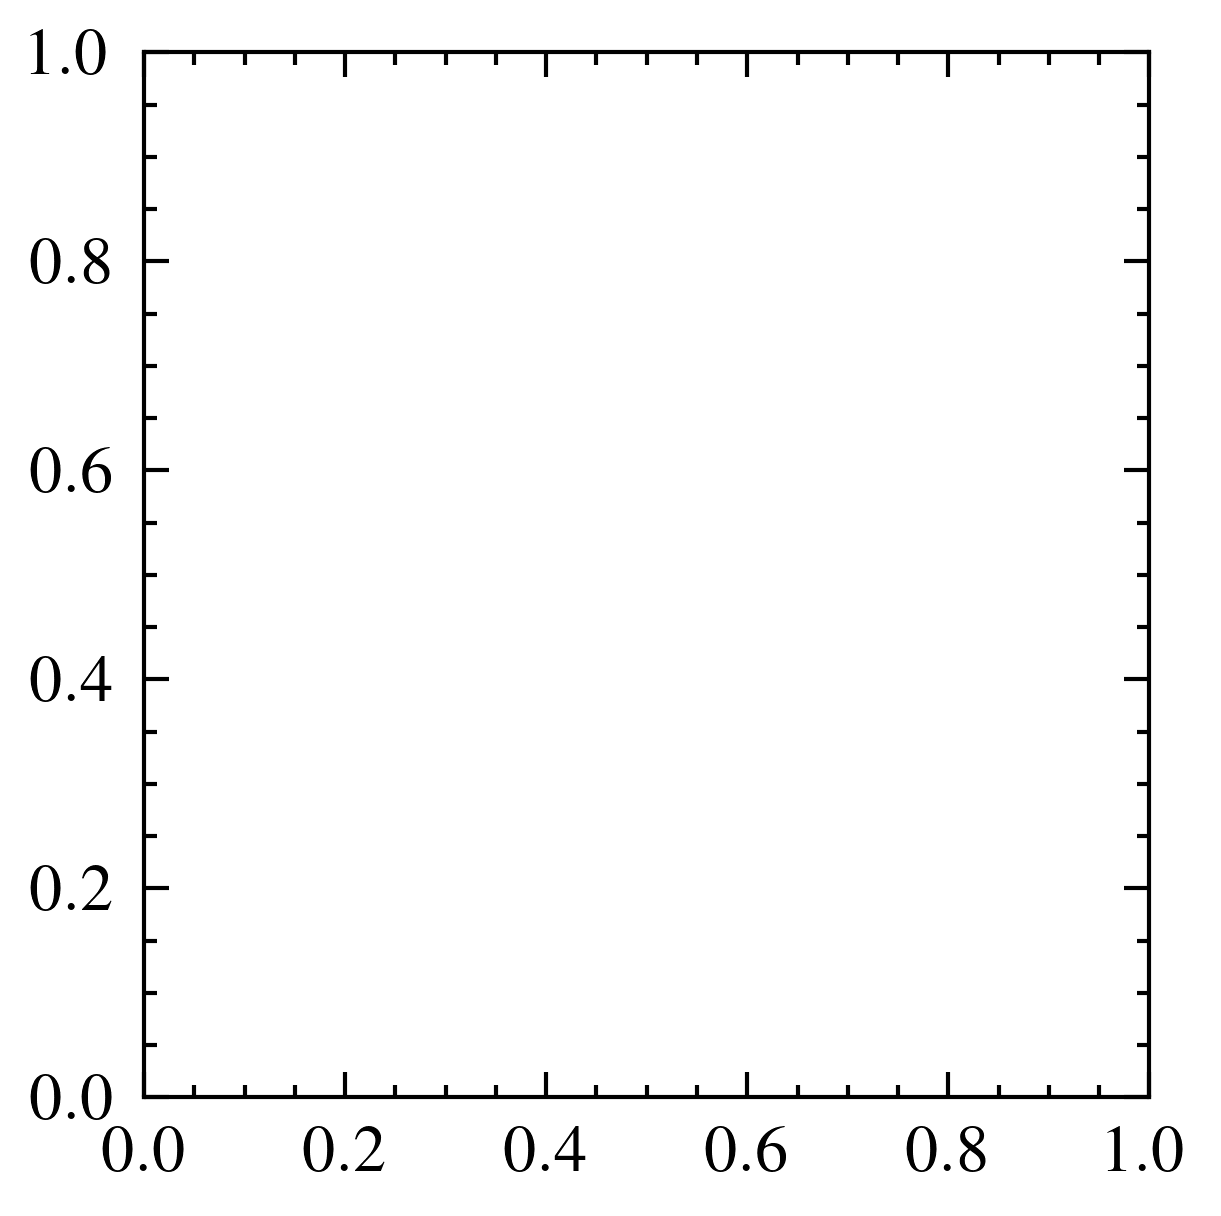

In [431]:
ax1 = fig.add_subplot(3,2,4)
fig

2. グラフを描く
    
    2.1. プロットを描く  

        ```
        ax1.plot(x座標の系列, y座標の系列)
        ```


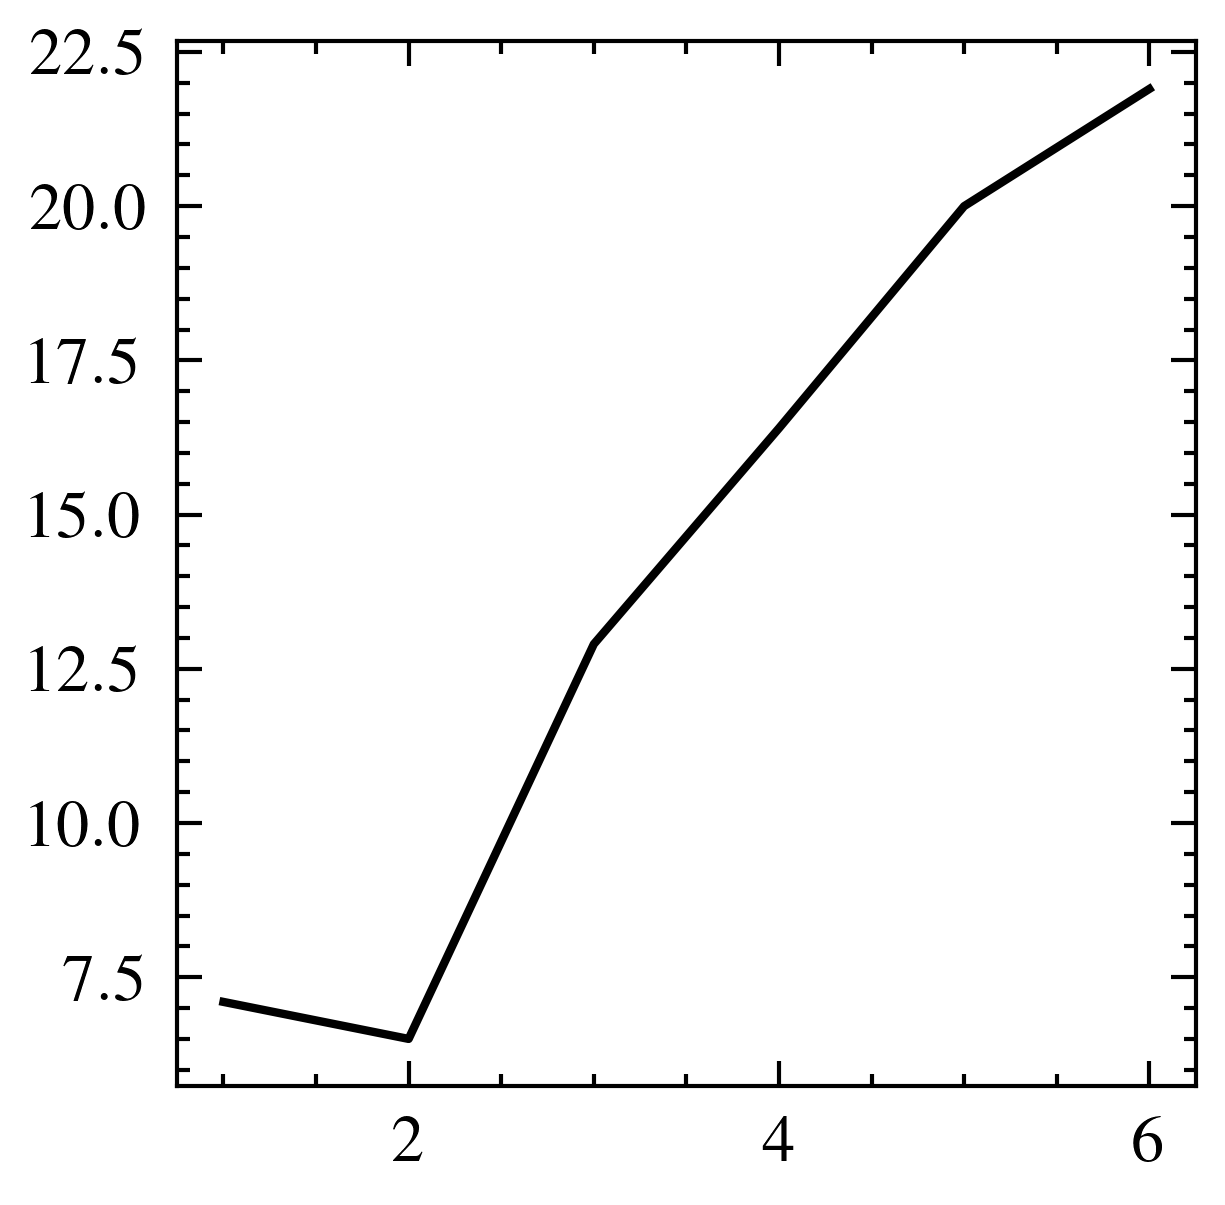

In [432]:
ax1.plot([1,2,3,4,5,6], df6['temperature'][-6:])
fig

    2.2. 軸ラベル，タイトル，凡例を補正する
    
        ```
        ax1.set_xlabel('横軸ラベル')
        ```
    


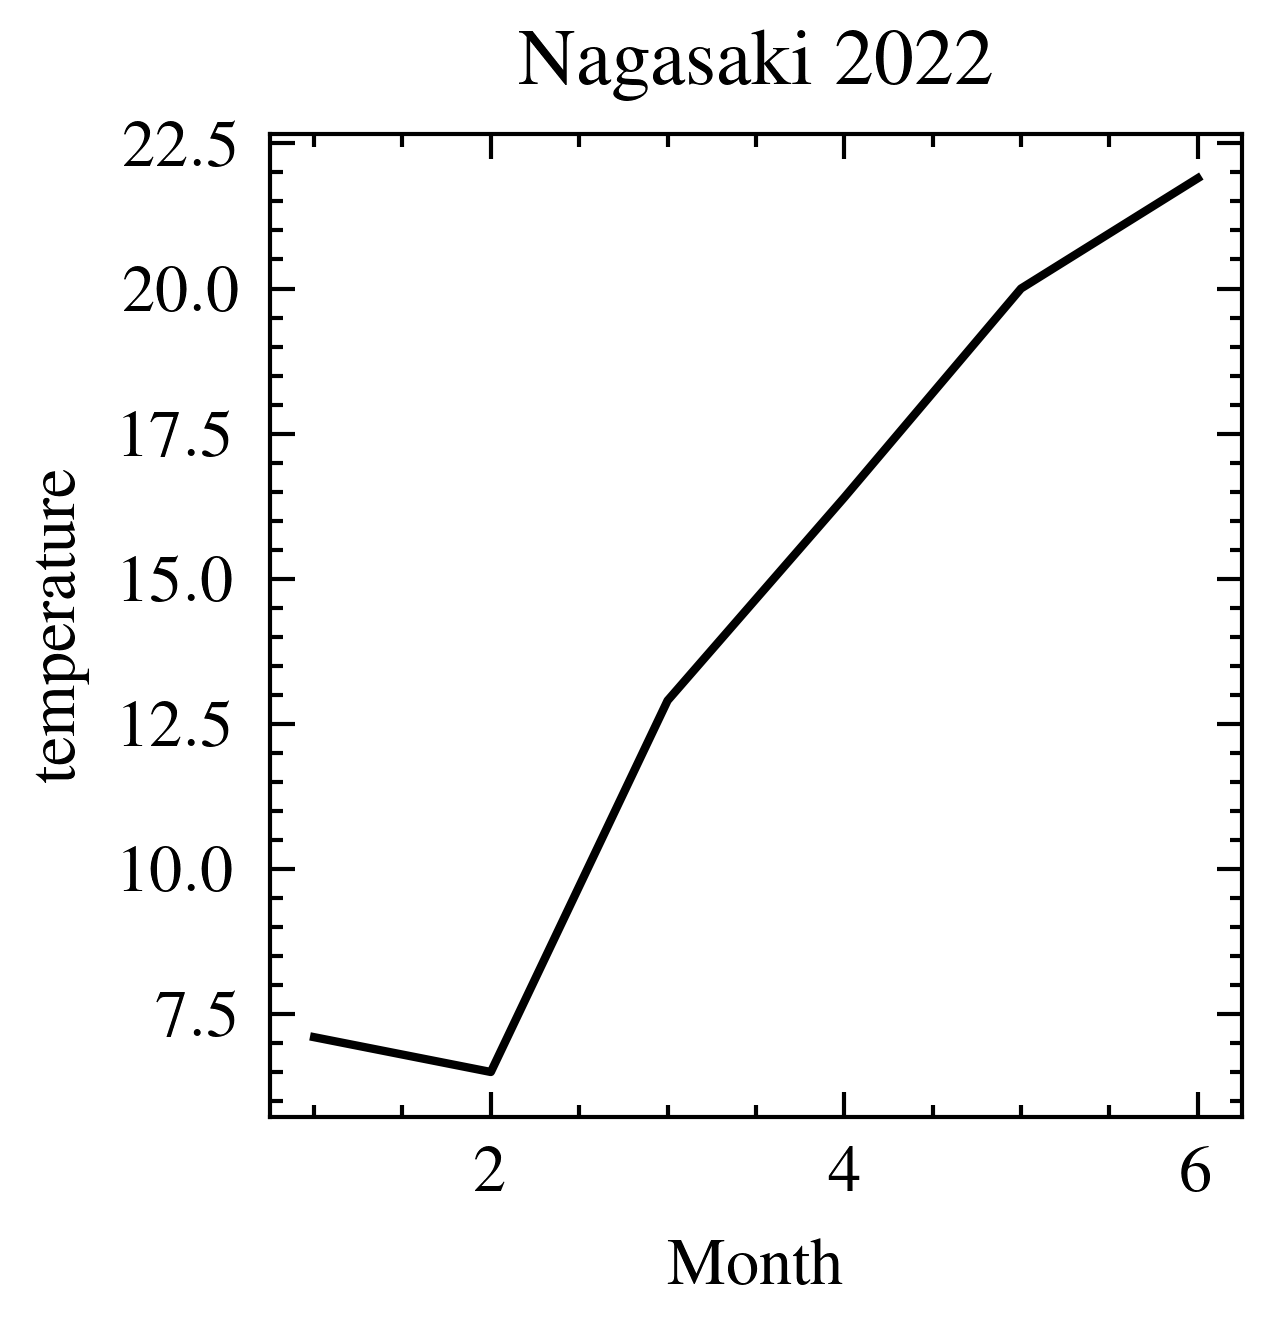

In [433]:
ax1.set_xlabel('Month')
ax1.set_ylabel('temperature')
ax1.set_title('Nagasaki 2022')
fig

    2.3. グリッド線をつけたり，表示領域を決めたり
        ```
        ax1.set_xlim()
        ax1.grid()
        ```


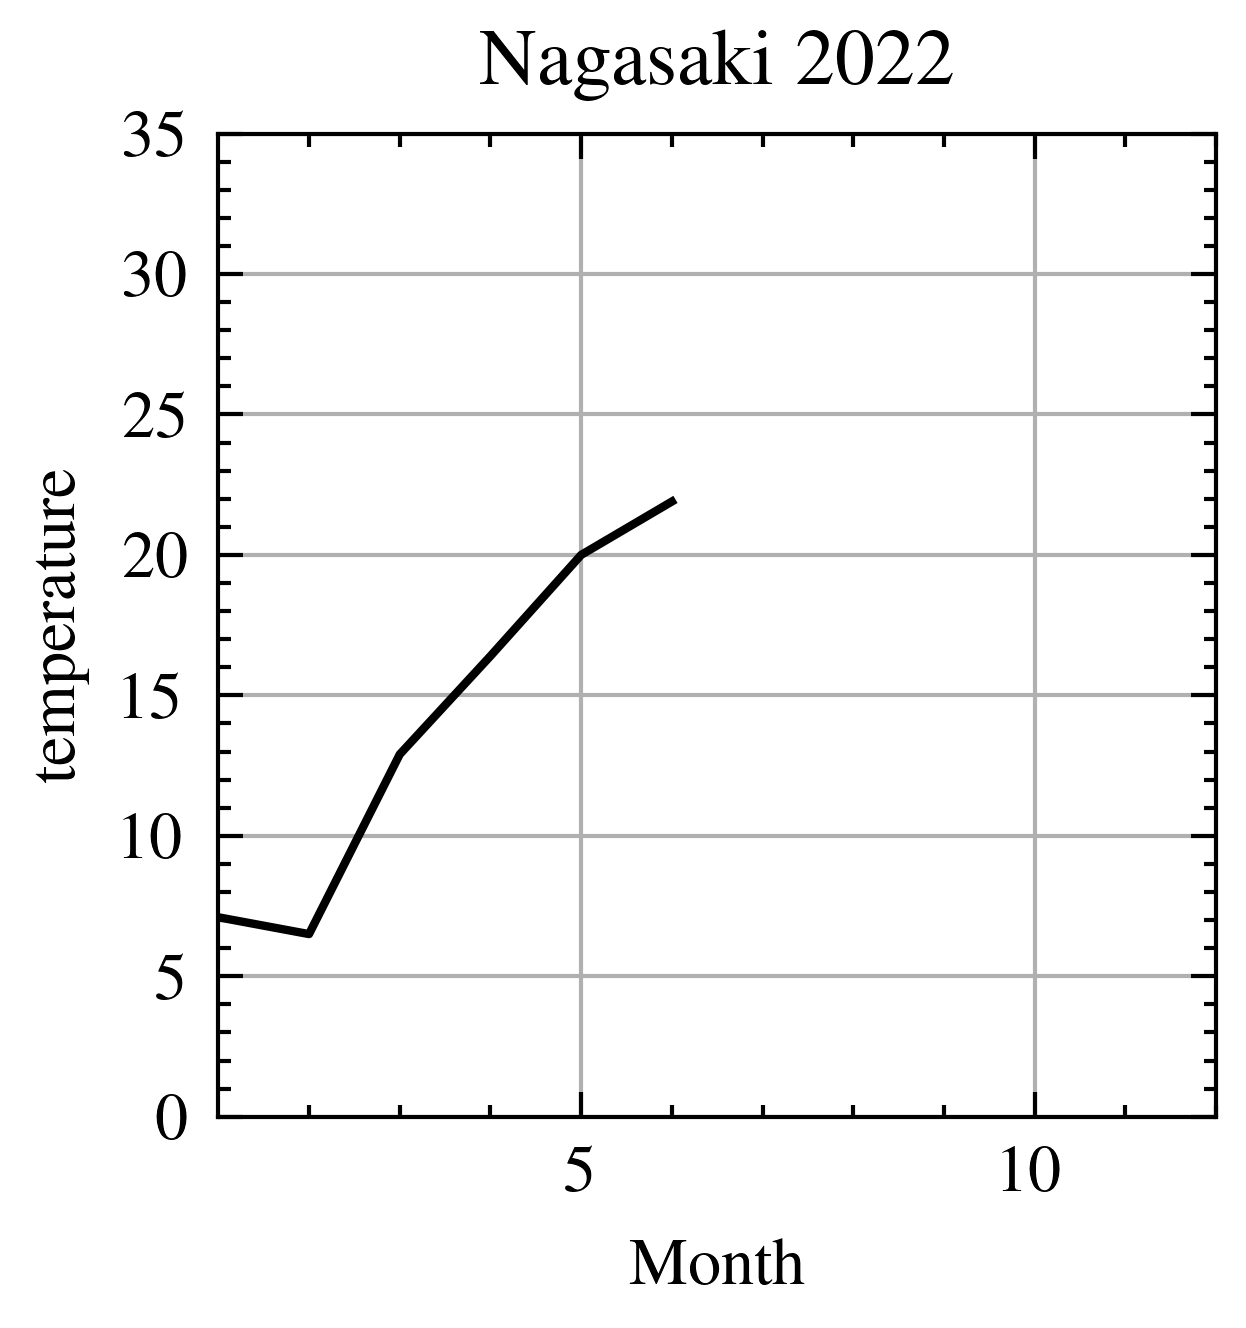

In [434]:

ax1.set_ylim([0,35])
ax1.set_xlim([1,12])
ax1.grid()
fig

キャンバスの別の領域に別のグラフを書く

DatetimeIndex(['1878-07-01', '1878-08-01', '1878-09-01', '1878-10-01',
               '1878-11-01', '1878-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


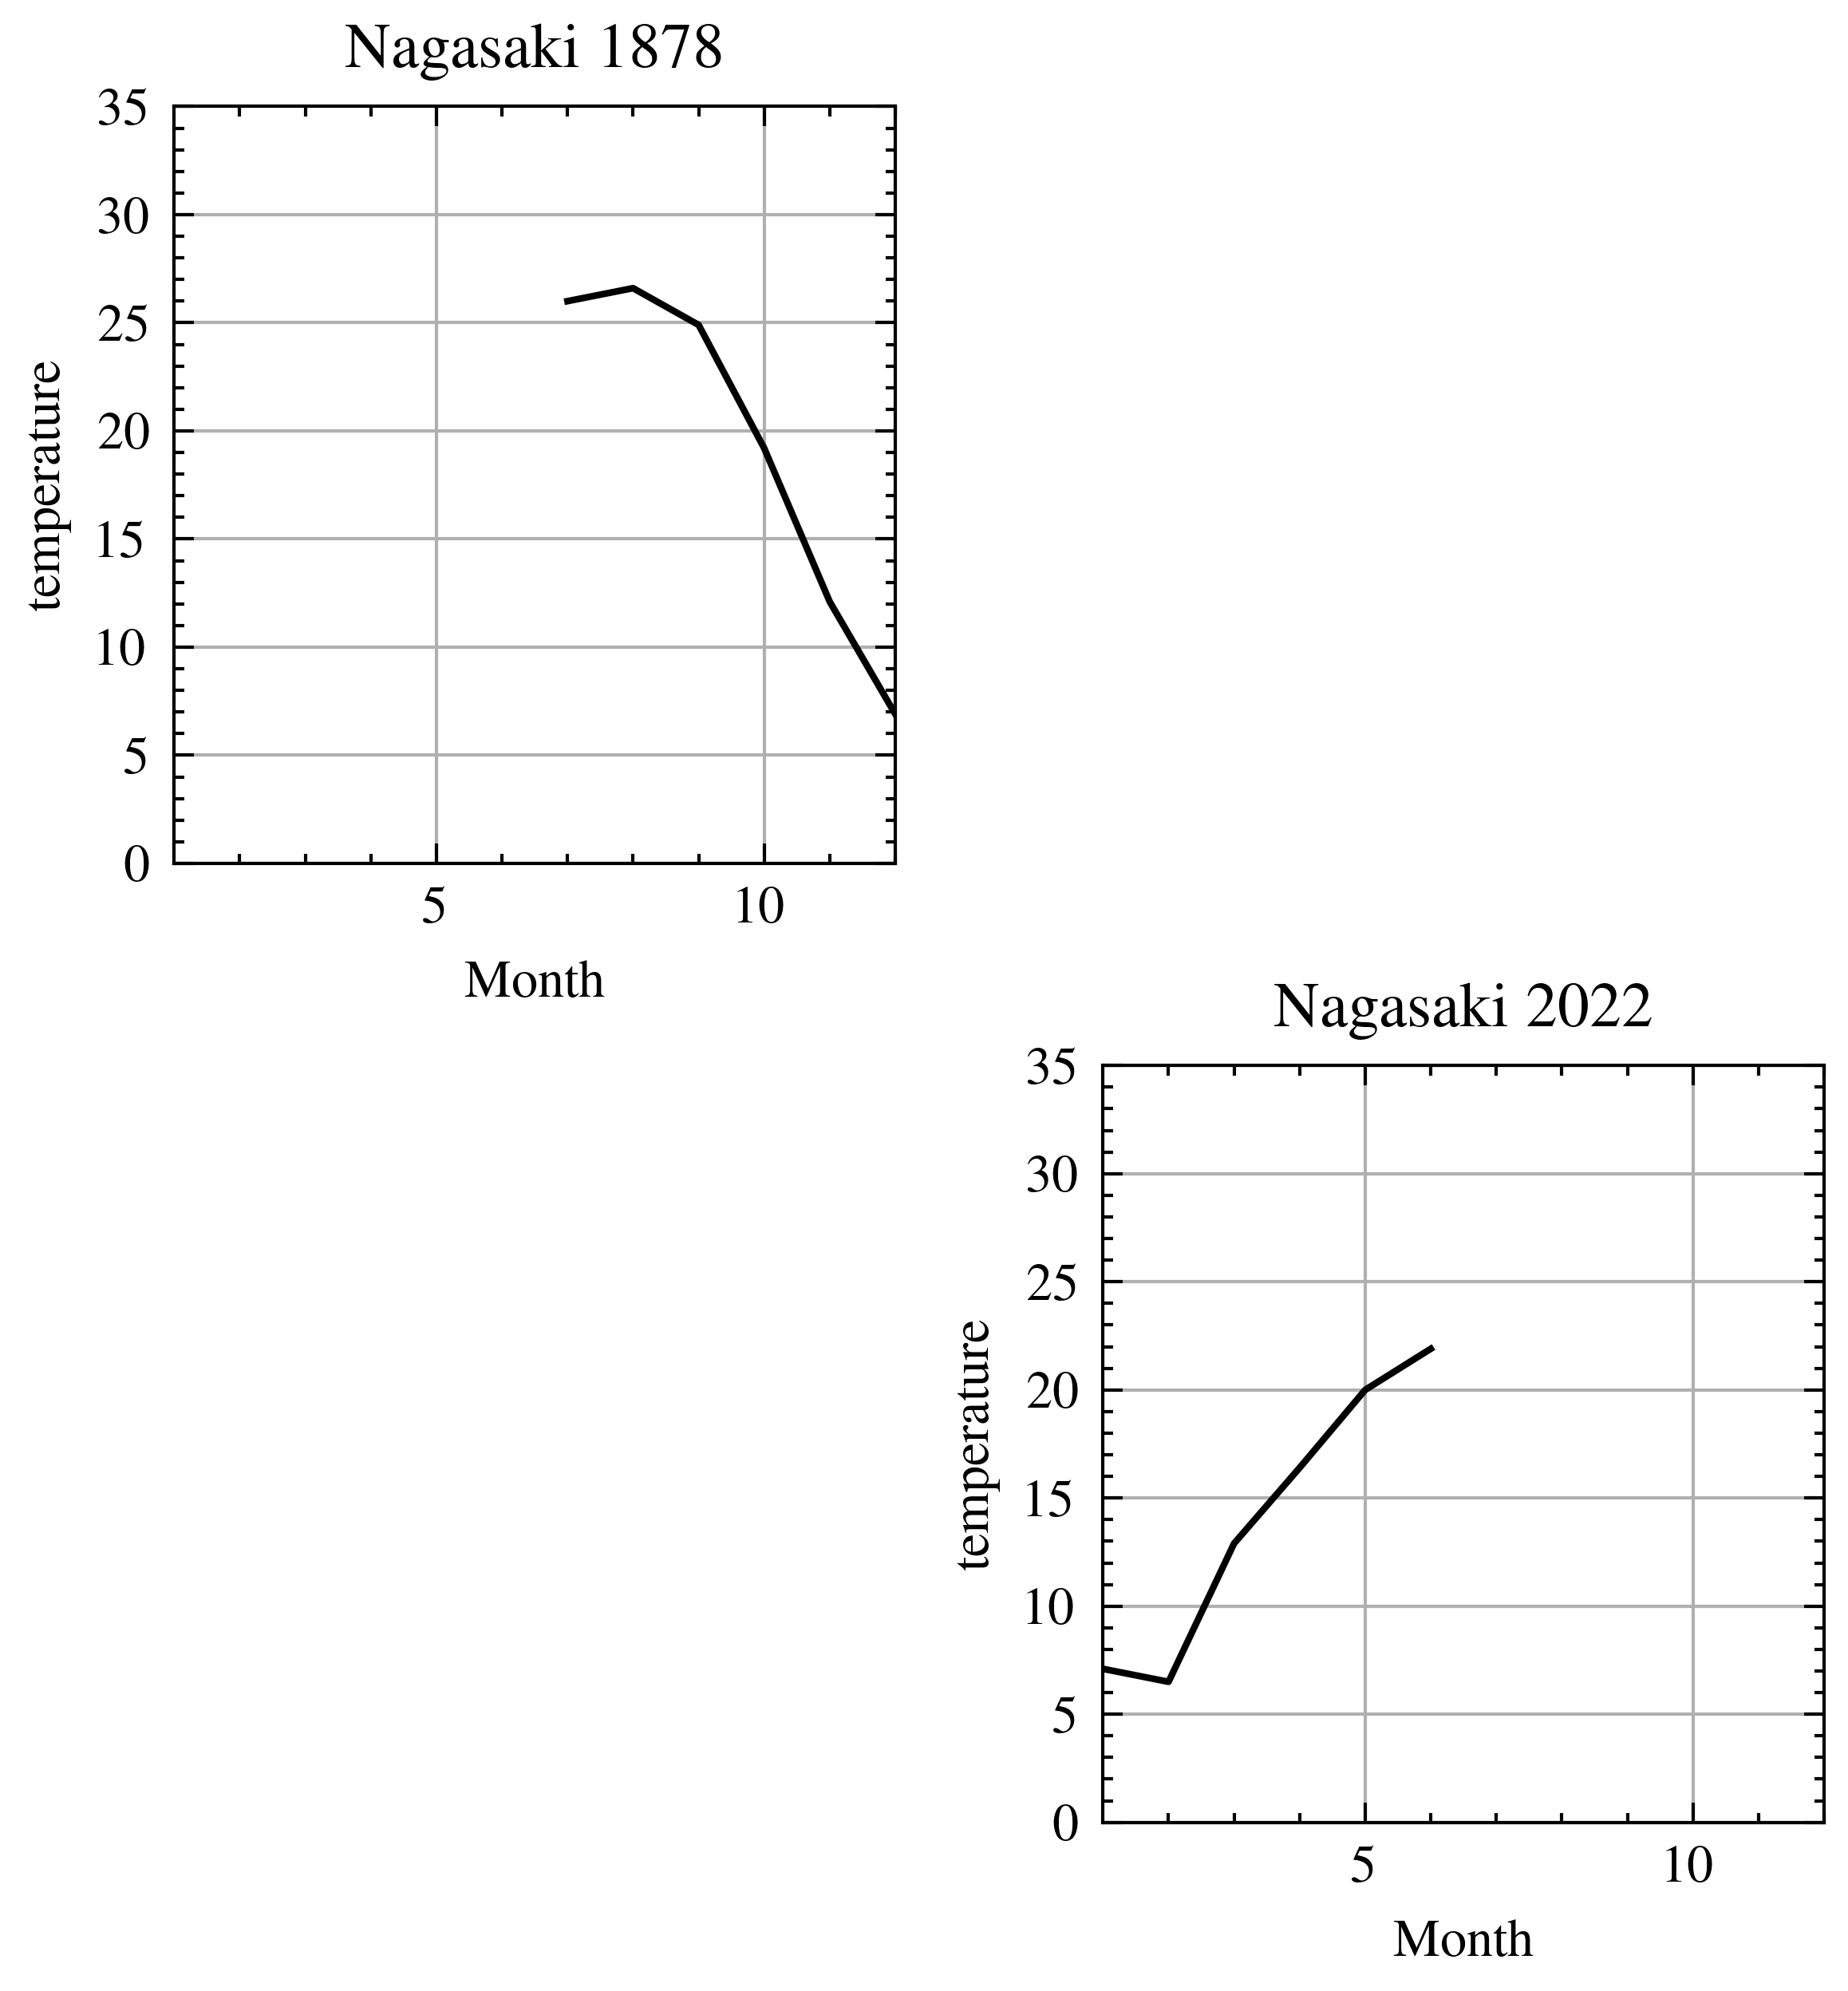

In [435]:
ax2 = fig.add_subplot(3,2,1)
print(df6.index[:6])
ax2.plot([7,8,9,10,11,12],df6['temperature'][:6])
ax2.set_xlabel('Month')
ax2.set_ylabel('temperature')
ax2.set_title('Nagasaki 1878')
ax2.set_ylim([0,35])
ax2.set_xlim([1,12])
ax2.grid()
fig

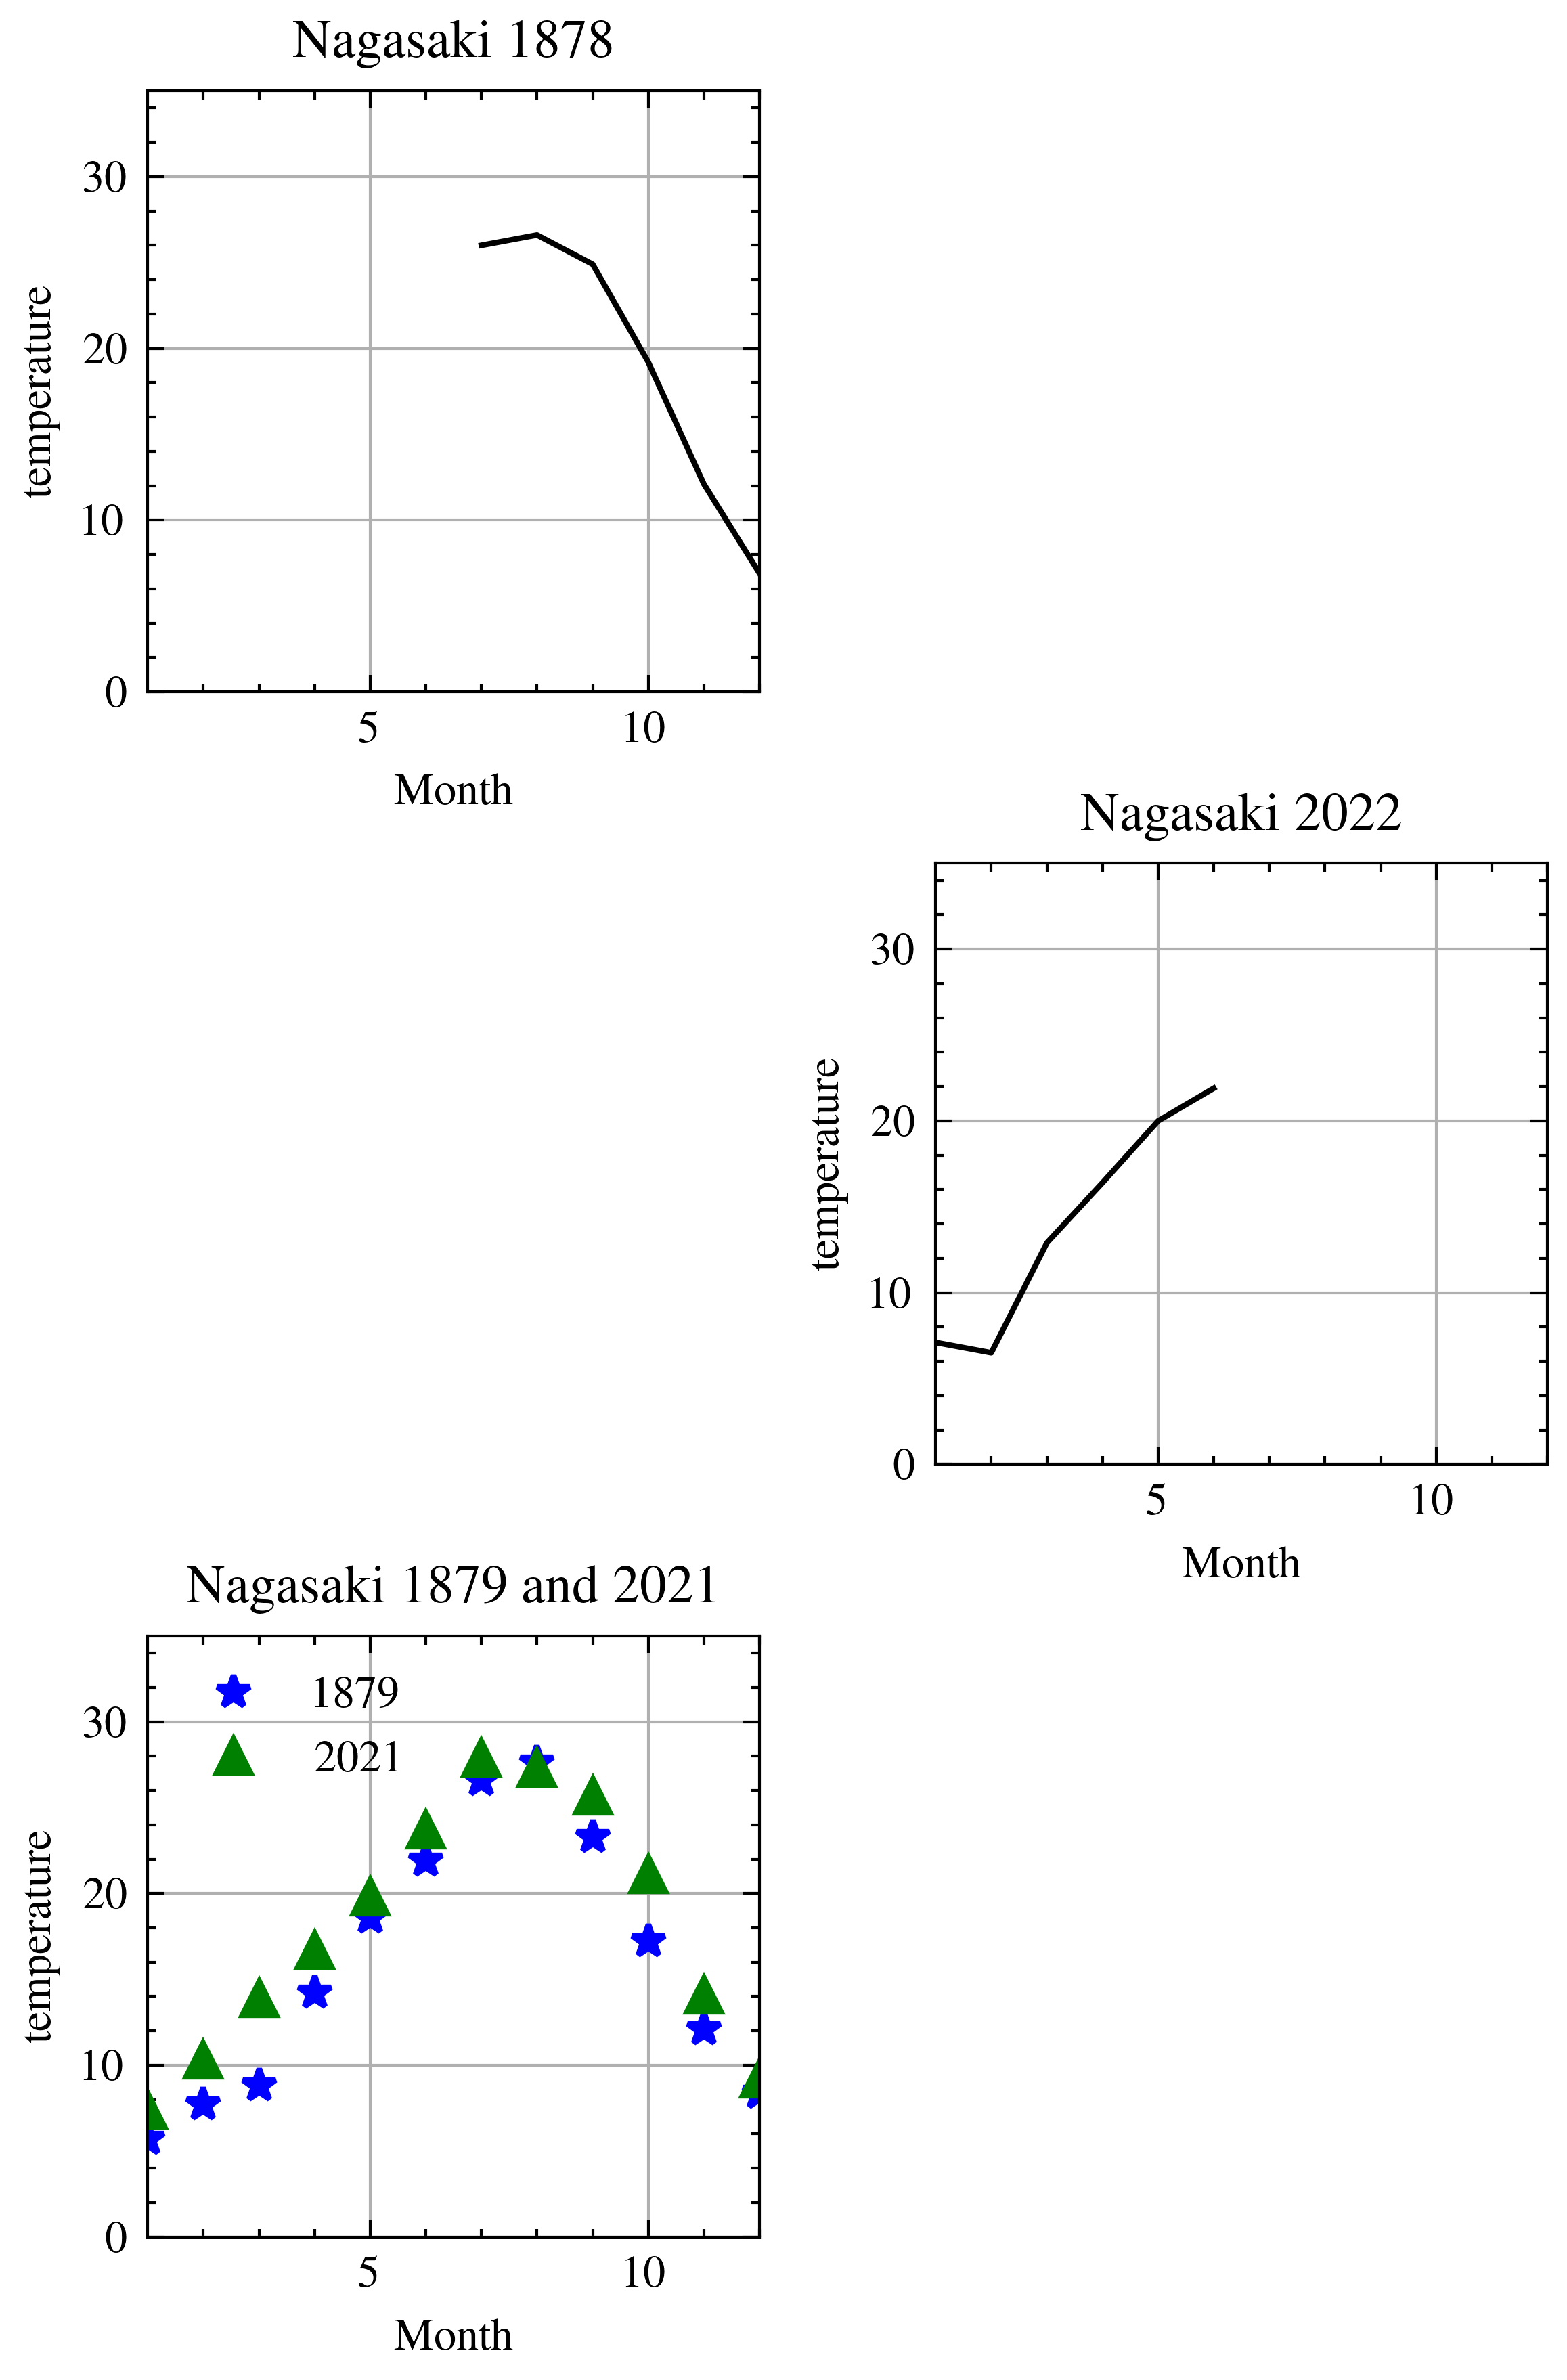

In [436]:
ax3 = fig.add_subplot(3,2,5)
ax3.plot(range(1,13),df6['temperature'][6:18],'b*',label='1879')
ax3.plot(range(1,13),df6['temperature'][-18:-6],'g^',label='2021')
ax3.set_xlabel('Month')
ax3.set_ylabel('temperature')
ax3.set_title('Nagasaki 1879 and 2021')
ax3.set_ylim([0,35])
ax3.set_xlim([1,12])
ax3.legend(loc='best')
ax3.grid()
fig

箱ひげ図を書くこともできる．: `boxplot`

- 箱ひげ図を置く横軸目盛を`positions`で指定する

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/kotaro/MyRepository/2022psp2/.venv/lib/python3.10/site-packages/matplotlib/ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


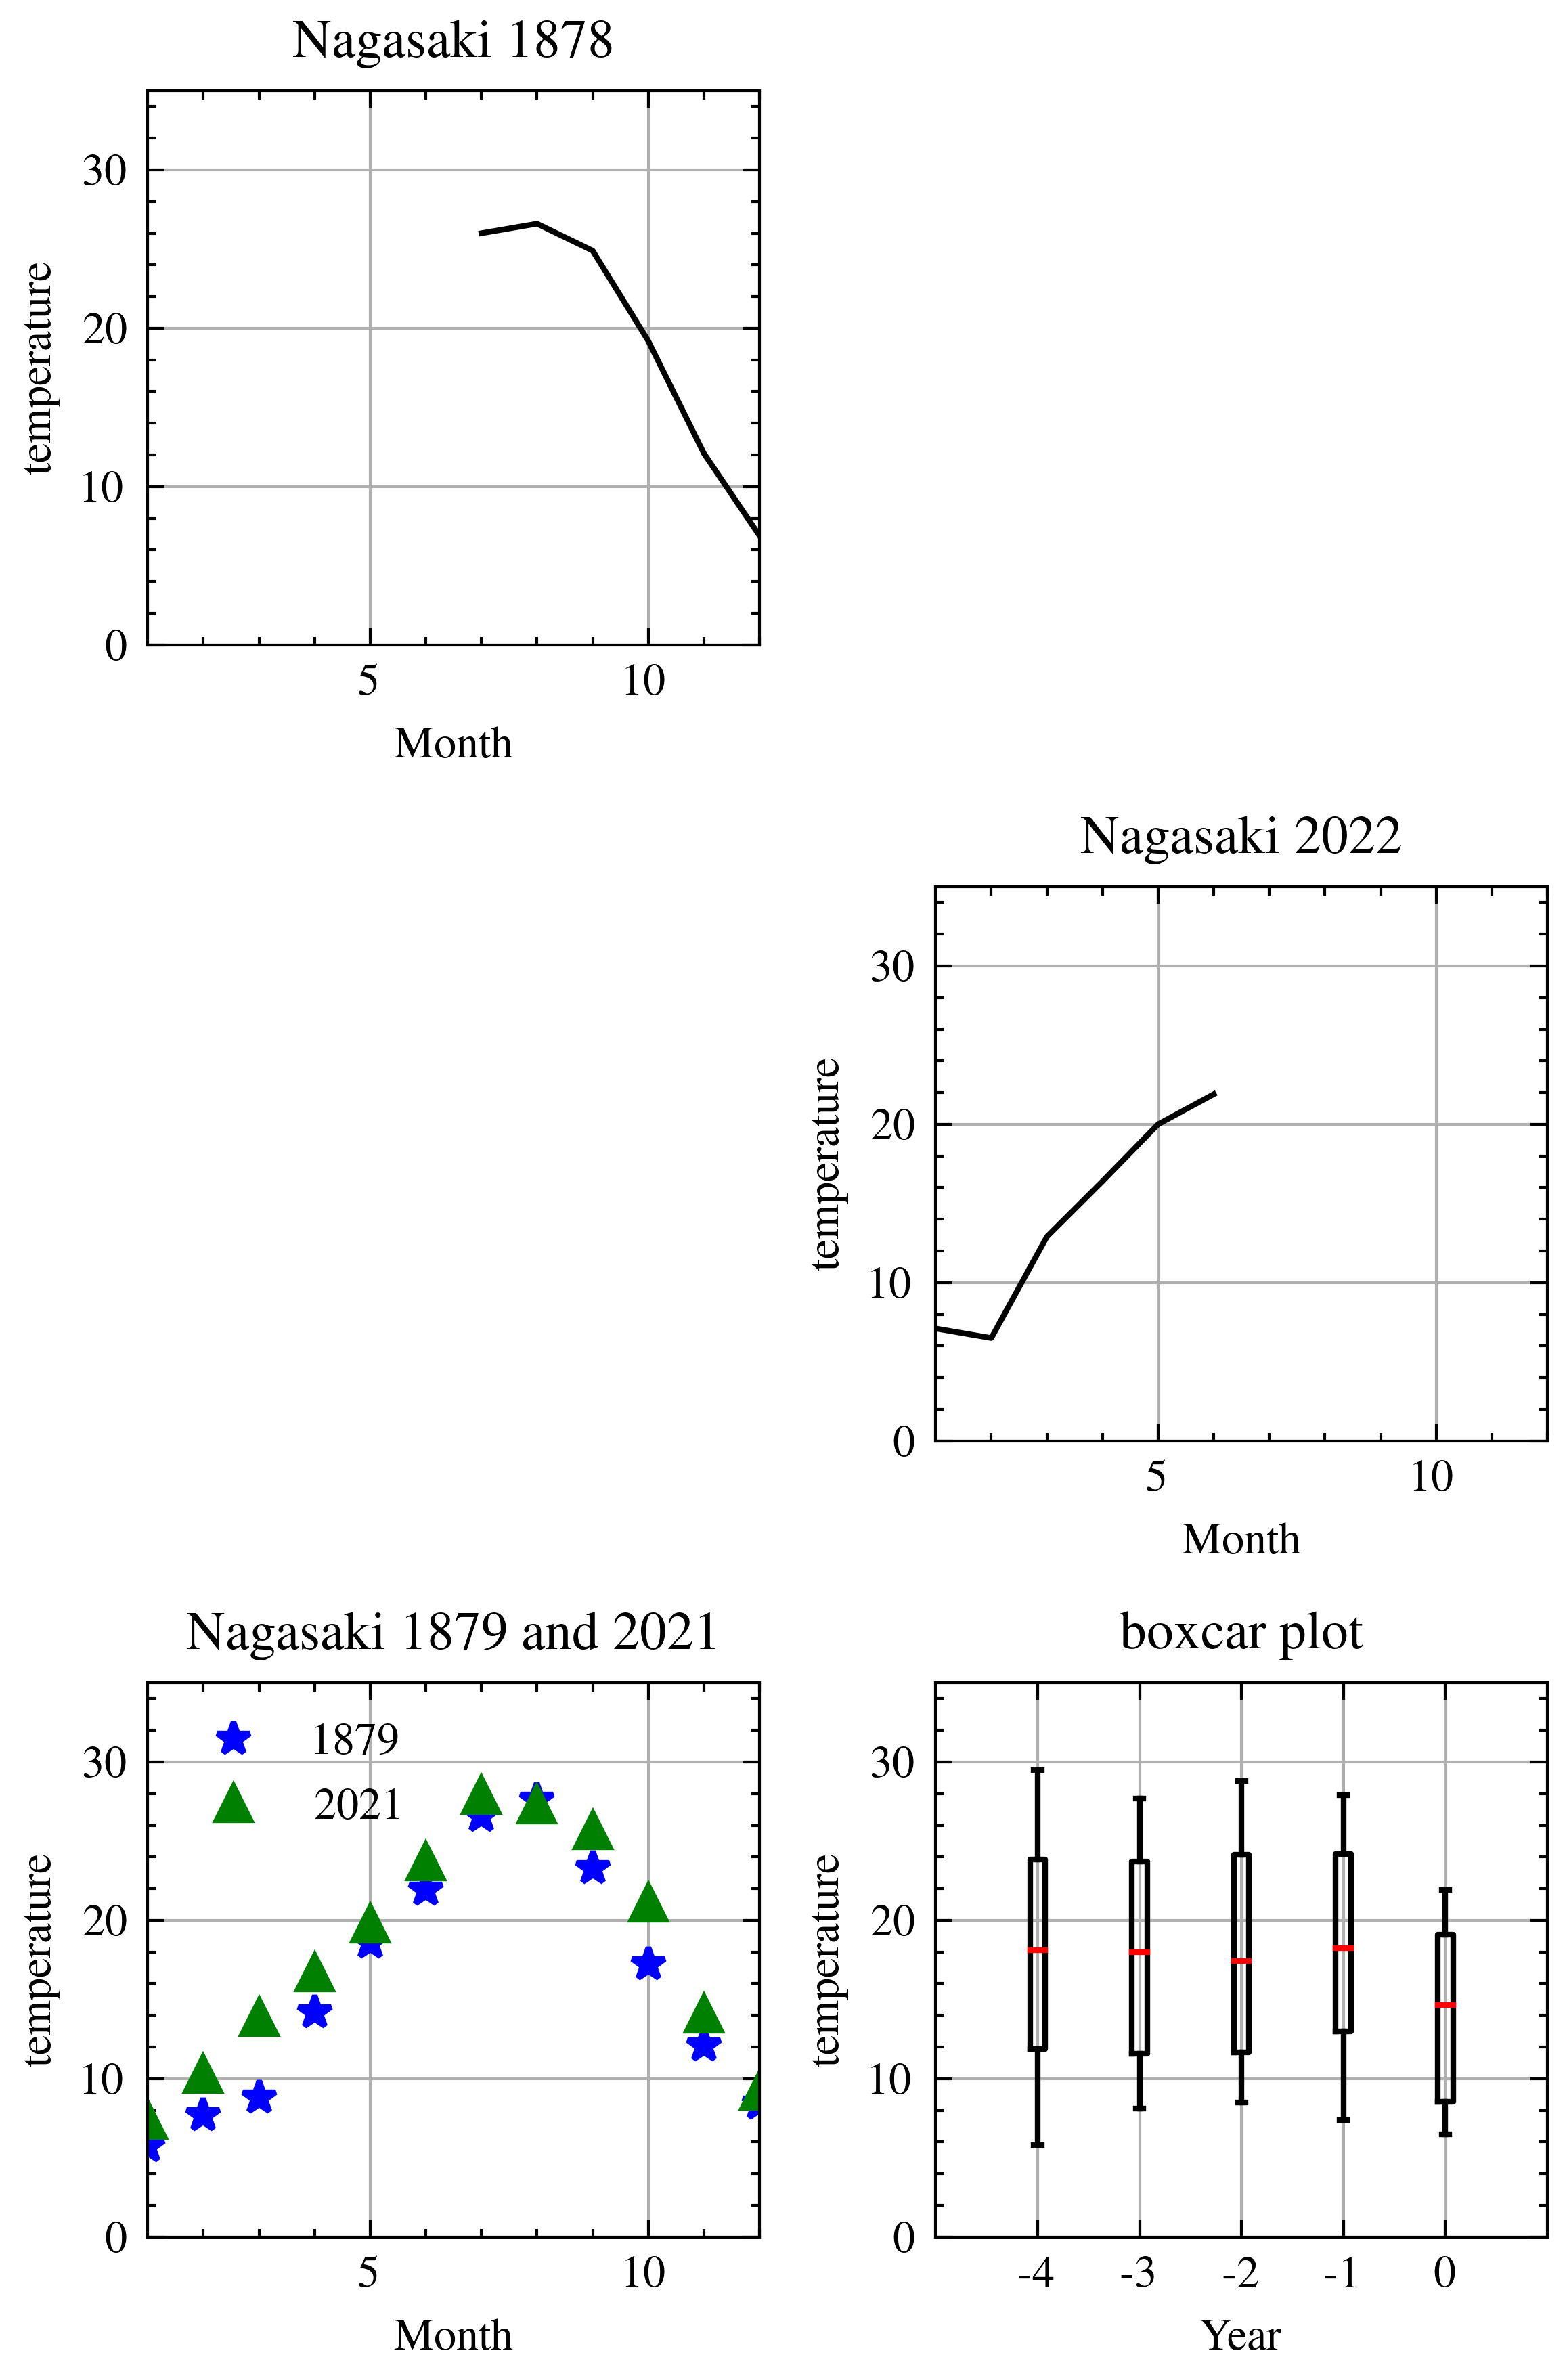

In [437]:
ax4 = fig.add_subplot(3,2,6)
ax4.boxplot(df6['temperature'][-6:],positions=[0])
ax4.boxplot(df6['temperature'][-18:-6],positions=[-1])
ax4.boxplot(df6['temperature'][-30:-18],positions=[-2])
ax4.boxplot(df6['temperature'][-42:-30],positions=[-3])
ax4.boxplot(df6['temperature'][-54:-42],positions=[-4])
ax4.set_xlabel('Year')
ax4.set_ylabel('temperature')
ax4.set_title('boxcar plot')
ax4.set_ylim([0,35])
ax4.set_xlim([-5, 1])
ax4.legend(loc='best')
ax4.grid()
fig


fig

## 課題 k03



上記で紹介した[リンク](https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1) https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1 のページには，「日平均気温」の表が見えていますが，
「日平均気温」以外にも同様の形式のデータを選ぶことができます．

適当なデータをスクレイピングして，4種類のグラフを1枚のキャンバスに図示するプログラム`k03.py`を作成せよ．グラフのタイトルや軸ラベルを適切につけること．

提出物
1. `k03.py`
2. 図示したキャンバスを保存した画像


In [104]:
import pandas as pd
import tabula # tabula-py: pdfをDataFrameに読むために必要

url_base = 'https://www.city.nagasaki.lg.jp/fukushi/450000/454000/p034301_d/fil/'
year = '2022'
month = '06'
df = pd.DataFrame()
for date in range(1,28):
    date = f'{date:02d}'
    url = url_base + year + month + date
    try:
        dflist = tabula.read_pdf(url+'.pdf', lattice=True, pandas_options={'header':1}, pages='2')
    except:
        url = url + '-1'
        dflist = tabula.read_pdf(url+'.pdf', lattice=True, pandas_options={'header':1}, pages='2')
    df_row = dflist[1][-1:]
    df_row.loc[1,'date'] = year+month+date
    cols = df_row.columns.tolist()
    unnamed = [x for x in cols if x.startswith('Unnamed:')]
    df_row.drop(columns=unnamed,inplace=True)
    df = pd.concat([df,df_row])
df

#df = dflist[2]
#df.columns = dflist[2].iloc[0].tolist()
#df

Got stderr: 6月 29, 2022 12:45:19 午前 org.apache.fontbox.ttf.CmapSubtable processSubtype14
警告: Format 14 cmap table is not supported and will be ignored

/var/folders/qq/y0p5l6xd5qb7l_6_x0nmwhv40000gn/T/ipykernel_66416/3951939018.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row.loc[1,'date'] = year+month+date
/var/folders/qq/y0p5l6xd5qb7l_6_x0nmwhv40000gn/T/ipykernel_66416/3951939018.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_row.drop(columns=unnamed,inplace=True)
Got stderr: 6月 29, 2022 12:45:19 午前 org.apache.fontbox.ttf.CmapSubtable proces

,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90歳以上,確認中,date,年代
1,13人,21人,14人,9人,8人,10人,4人,1人,1人,人,人,20220601,NaN
1,8人,7人,6人,8人,4人,3人,1人,2人,人,人,人,20220602,NaN
1,14人,12人,12人,8人,6人,7人,5人,人,1人,人,人,20220603,NaN
1,12人,8人,6人,8人,9人,4人,3人,1人,人,人,人,20220604,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14人
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220605,NaN
1,6人,4人,4人,8人,8人,2人,1人,人,2人,人,人,20220606,NaN
1,32人,14人,4人,15人,9人,5人,2人,1人,人,人,人,20220607,NaN
1,20人,22人,9人,10人,5人,8人,3人,2人,人,人,人,20220608,NaN
1,14人,14人,12人,18人,13人,5人,2人,1人,1人,人,人,20220609,NaN
